In [1235]:
import numpy as np
import matplotlib.pyplot as plt

In [1236]:
from importlib import reload

import ensembling
ensembling = reload(ensembling)

from ensembling import Blender, Stacker

In [1237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# blender model
from sklearn.linear_model import LogisticRegression

In [1238]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles

Generate a **dataset**.

In [1239]:
length = 1000

rand = np.random.RandomState(123)

X1, y1 = make_gaussian_quantiles(mean=(25, 7), 
                                 cov=6.0, 
                                 n_samples=length, n_classes=2,
                                 random_state=rand)

X2 = np.concatenate((rand.normal(1, 3, (length//2, 2)), 
                     rand.normal(8, 3, (length//2, 2))))
y2 = np.concatenate((np.ones(length//2), np.zeros(length//2)))

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

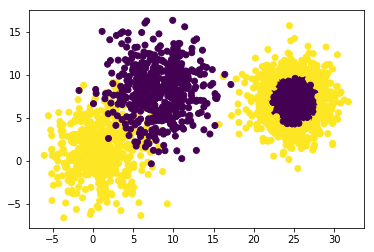

In [1240]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [1241]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.4,
                                                   random_state=rand)

### Fit three different models to the data. (RandomForest, SVM and LogisticRegression)

In [1242]:
random_forest = RandomForestClassifier(10, max_depth=1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1243]:
svm = SVC(C=0.1, gamma=5, probability=True)
svm.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1244]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/tigran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Get the predictions of each model.

In [1245]:
random_forest_pred = random_forest.predict(X_test)
svm_pred = svm.predict(X_test)
log_reg_pred = log_reg.predict(X_test)

See how well each model does on test data by plotting.

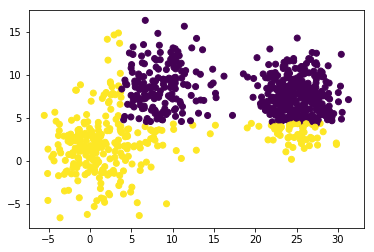

In [1246]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=random_forest_pred)
plt.show()

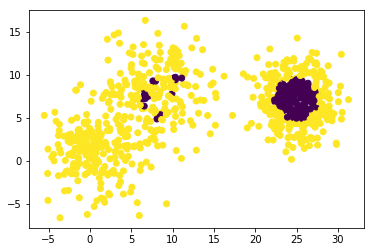

In [1247]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=svm_pred)
plt.show()

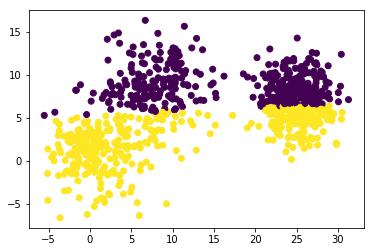

In [1248]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=log_reg_pred)
plt.show()

Measure the accuracy scores for each model.

In [1249]:
random_forest.score(X_test, y_test), svm.score(X_test, y_test), log_reg.score(X_test, y_test)

(0.76875, 0.73375, 0.73375)

Initialize Blender with *two* models.

In [1250]:
blender = Blender([svm, random_forest], 
                  LogisticRegression(), 
                  blend_size=0.4)

In [1251]:
blender.train(X_train, y_train)

/home/tigran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


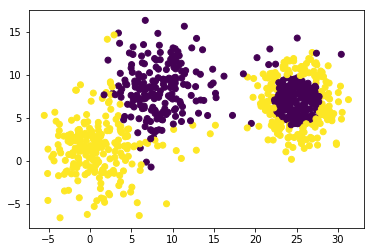

In [1252]:
pred = blender.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.show()

In [1253]:
blender.score(X_test, y_test)

0.92625

Now initialize **Bleder** with *three* models and train it.

In [1254]:
blender = Blender([svm, random_forest, log_reg], 
                  LogisticRegression(), 
                  blend_size=0.4)

blender.train(X_train, y_train)

/home/tigran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tigran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


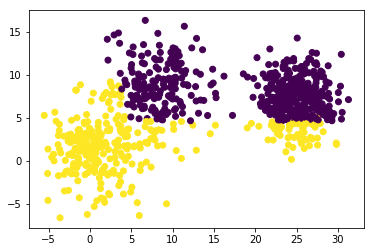

In [1255]:
pred = blender.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.show()

It is clear that, it does much worse because, 
**LogisticRegression** and **RandomForest** had 
relatively similar predictions.

In [1256]:
blender.score(X_test, y_test)

0.77375

Initialize **Stacker**.

In [1262]:
stacker = Stacker([svm, random_forest],
                 LogisticRegression(),
                 stack_size=0.4)

stacker.train(X_train, y_train)

/home/tigran/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We can not see much of a difference, but **Stacker**
needs to be improved.

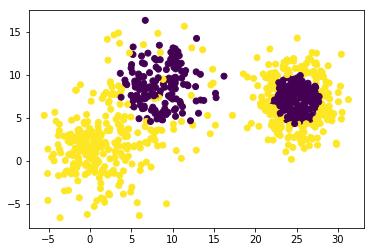

In [1265]:
pred = stacker.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=pred);

In [1266]:
stacker.score(X_test, y_test)

0.90375